# Analysis on data aquired

<p>In this notebook we analyze the data parsed from all sources found in order to explain how during this COVID-19 epidemic the countries around the world have performed test to found infects.<br>
</p>

# Target Questions

Clustr:
    Identificare i cluster che distinguono i vari paesi a seconda di come abbiano affrontato questa epidemia, provare a trovare una correlazione se paesi che abbiano adottato politiche simili abbiano ottenuto gli stessi risulati
    
    1)Lasso di tempo
    2)Test effettuati pro capite
    3)Test positivi in percentuale 
    4)Politiche adottate
    5)GDP pro capite
    6)Età media

In [1]:
%cd data
%run italy_data.ipynb
%run usa_data.ipynb
%run uk_data.ipynb
%run brazil_data.ipynb
%run south_korea_data.ipynb
%run indonesia_data.ipynb
%run india_data.ipynb
%run world_population.ipynb

/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [2]:
#pd.set_option('display.max_rows', 500)

# Data used
We imported data from different country and grouped having the same columns name and arranged by date with the same structure

Those are database that we used to collect data from:

## Italy (national and regional)
### Updated: 25/04/2020
Source : https://github.com/pcm-dpc/COVID-19 

## USA:
### Updated: 24/04/2020
Source : https://github.com/COVID19Tracking/covid-tracking-data 

## UK:
### Updated: 29/04/2020
Source : https://github.com/tomwhite/covid-19-uk-data 

## Brazil:
### Updated: 30/03/2020
Source : https://www.kaggle.com/unanimad/corona-virus-brazil
<ul><b>Dataset not updated</b></ul>

## SK:
### Updated: 20/04/2020
Source : https://www.kaggle.com/kimjihoo/coronavirusdataset 

## Indonesia:
### Updated: 31/03/2020
Source : https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases
<ul><b>Dataset not updated</b></ul>

## India:
### Updated: 30/04/2020
Source : https://www.kaggle.com/sudalairajkumar/covid19-in-india 

More details about the columns we used for each dataset are listed in the README file.

# Sorted CSV

Structure of dataset are same for national and regional scale, below the explanation of columns: <br>
<ul>
<li><b>total_cases: </b>cumulative number of infect<br></li>
<li><b>daily_cases: </b>daily new infect<br></li>
<li><b>actual_cases: </b>people actually infect<br></li>
<li><b>total_healed: </b>cumulative number of healed<br></li>
<li><b>daily_healed: </b>daily number of healed<br></li>
<li><b>total_dead: </b>cumulative number of dead<br></li>
<li><b>daily_dead: </b>daily number of dead<br></li>
<li><b>total_home_isolation: </b>cumulative number of people forced to home isolation<br></li>
<li><b>daily_home_isolation: </b>daily number of people forced to home isolation, variation between day before, can be negative<br></li>
<li><b>total_recovered_with_symptoms: </b>cumulative number of people recovered with symptoms<br></li>
<li><b>daily_recovered_with_symptoms: </b>daily number of people recovered with symptoms, variation between day before, can be negative<br></li>
<li><b>total_intensive_care: </b>cumulative number of people in intesive care<br></li>
<li><b>daily_intensive_care: </b>daily number of people in intesive care, variation between day before, can be negative<br></li>
<li><b>total_hospitalized: </b>cumulative number of hospitalized: simple recover + intensive care<br></li>
<li><b>daily_hospitalized: </b>daily number of hospitalized: simple recover + intensive care, variation between day before, can be negative<br></li>
<li><b>total_test: </b>cumulative number of test made<br></li>
<li><b>daily_test: </b>daily number of test made<br></li>
</ul>

Not every CSVs have all the columns listed above, due to limited data avaiable.

# Import Covid related CSVs

In [3]:
import re
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
%cd data

[Errno 2] No such file or directory: 'data'
/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness/data


In [5]:
states = ["india","italy","brazil","indonesia","south_korea","united_kingdom","usa"]

not_updated = ["brazil", "indonesia"]

states = set(states) - set(not_updated)

states = list(states)

In [6]:
state_csv = {}
italian_regions_csv = {}

for state in states:
    path = os.getcwd() + "/parsed_data/"
    path += state + "/" + state + ".csv" 
    path = path.replace("/",os.path.sep)
    state_csv[state] = pd.read_csv(path, index_col = 0)
    
path = os.getcwd() + "/parsed_data/italy/"
path = path.replace("/",os.path.sep)

all_csv = glob.glob(path + "*.csv")
all_csv.remove(path + "italy.csv")

for file in all_csv:
    result = os.path.basename(file).replace('.csv','')
    italian_regions_csv[result] = pd.read_csv(file, index_col = 0)

# Other data used

We collect other useful information that could help us to investigate different scenario:
<ul>
    <li><b>GDP</b>: Data from 2018</li>
    Source: https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
<li><b>Population</b></li>
    <ul>
    <li>Number of people</li>
    <li>Age</li>
    Source: https://population.un.org/wpp/Download/Standard/CSV/
    </ul></ul>
We extract the information needed and parsed into new csv files through the code in /world_population.ipynb

## Import other data CSVs

In [7]:
path_gdp = os.getcwd() + "/parsed_data/world/GDP.csv"
path_population = os.getcwd() + "/parsed_data/world/Population.csv"
path_lockdown = os.getcwd() + "/parsed_data/world/Lockdown.csv"
path_info = os.getcwd() + "/parsed_data/world/Info.csv"

path = path.replace("/",os.path.sep)

gdp = pd.read_csv(path_gdp, index_col = 0)
population = pd.read_csv(path_population, index_col = 0)
lockdown = pd.read_csv(path_lockdown, index_col = 0)
lockdown.columns = ['Country', 'Date_Start', 'Date_end_intended',
       'Description', 'Keywords']
info = pd.read_csv(path_info, index_col = 0)

In [8]:
info

,political_spectrum,systems_of_government,continent
country,,,
italy,centre-left,parliamentary republics,europe
india,centre-right,parliamentary republics,asia
south_korea,centre-left,semi-presidential system,asia
united_kingdom,centre-right,constitutional monarchy,europe
usa,centre-right,presidential republics,america


### Define a lockdown meter (TODO)


<p>Lockdown meter measures how much strict the pandemic prevention policies adopted by each state have been</p>

In [9]:
lockdown.columns = ['Country', 'Date_Start', 'Date_end_intended',
       'Description', 'Keywords']

unique_values = pd.unique(lockdown["Keywords"])
all_keywords = []

for row in lockdown.iterrows():
    row_keywords_found = row[1][4].split(",")
    all_keywords += row_keywords_found
    
dummy_all_keywords = all_keywords.copy()
all_keywords = []
meaningfull_keywords = ['closure','distancing','quarantine','remote', 'isolation', 'hospital', 'hygiene', 'medical', 'suspension']
for keyword in dummy_all_keywords:
    for meaningfull_keyword in meaningfull_keywords:
        if meaningfull_keyword in keyword.split():
            keyword = keyword.strip()
            all_keywords.append(keyword)
    

all_keywords = list(dict.fromkeys(all_keywords))    

#len(all_keywords)

result = pd.DataFrame([(d, tup.Country,tup.Date_Start,tup.Date_end_intended) for tup in lockdown.itertuples() for d in tup.Keywords.split(", ")])
result.columns = ["keyword","country","date_start","date_end_intended"]
result.head(30)
result2 = pd.DataFrame([(tup.keyword, tup.country, tup.date_start, tup.date_end_intended) for tup in result.itertuples()if tup.keyword in all_keywords])
result2.columns = ["keyword","country","date_start","date_end_intended"]

#result2[result2["country"]=="Italy"]

# Plot data

## First impression

We would like to compare the number of test performed by each nation with the number of total infected people in order to find some possibile correlation between tests made nad infected founded.

In [10]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-04-20")
    test = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
    
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

The graph below show the comparison between the results obtained from each state

Text(0.5, 1.0, 'Barplot of total test and cases for each nation')

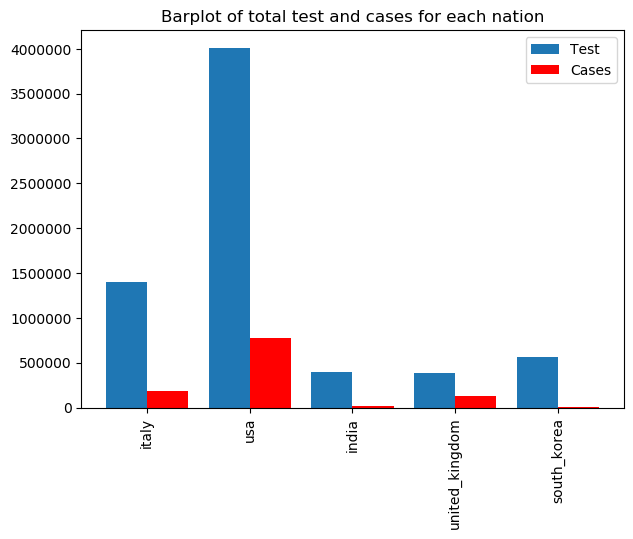

In [11]:
fig, axes = plt.subplots(figsize=(7,5), dpi=100)

ind = np.arange(len(df.index))
plt.bar(ind-0.2, width=0.4, height=df.total_test)
plt.bar(ind+0.2, width=0.4, height=df.total_cases, color = "r")
plt.legend(["Test", "Cases"])

idx = df.index.values
idx = np.insert(idx, 0, "null") #Just to shift elements
axes.set_xticklabels(idx)

plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases for each nation')

<p>Put data togher and we will see the percentage of positive test foreach country <p>

Text(0.5, 1.0, 'Barplot of total test and cases on 20/04/2020 in %')

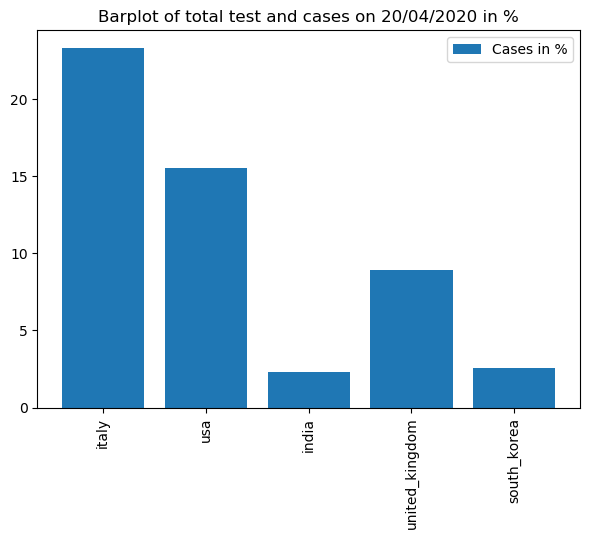

In [12]:
data = []
index_state = []

for state in state_csv:
    index_state.append(state)
    ix = state_csv[state].index.get_loc("2020-03-24")
    test = 100/state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_test")]
    cases = test*state_csv[state].iloc[ix, state_csv[state].columns.get_loc("total_cases")]
    temp = {"total_test":test,"total_cases":cases}
    data.append(temp)
                     
df = pd.DataFrame(data, index = index_state, columns = ["total_test", "total_cases"]) 

fig, axes = plt.subplots(figsize=(7,5), dpi=100)

plt.bar(df.index, height=df.total_cases)
plt.legend(["Cases in %"])


plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
plt.title('Barplot of total test and cases on 20/04/2020 in %')

# Some time series

### How the epidemic evoled during time

Comparison between:
<ul>
<li> <b>total cases</b> </li> 
<li> <b>number of test</b> </li>  
</ul>

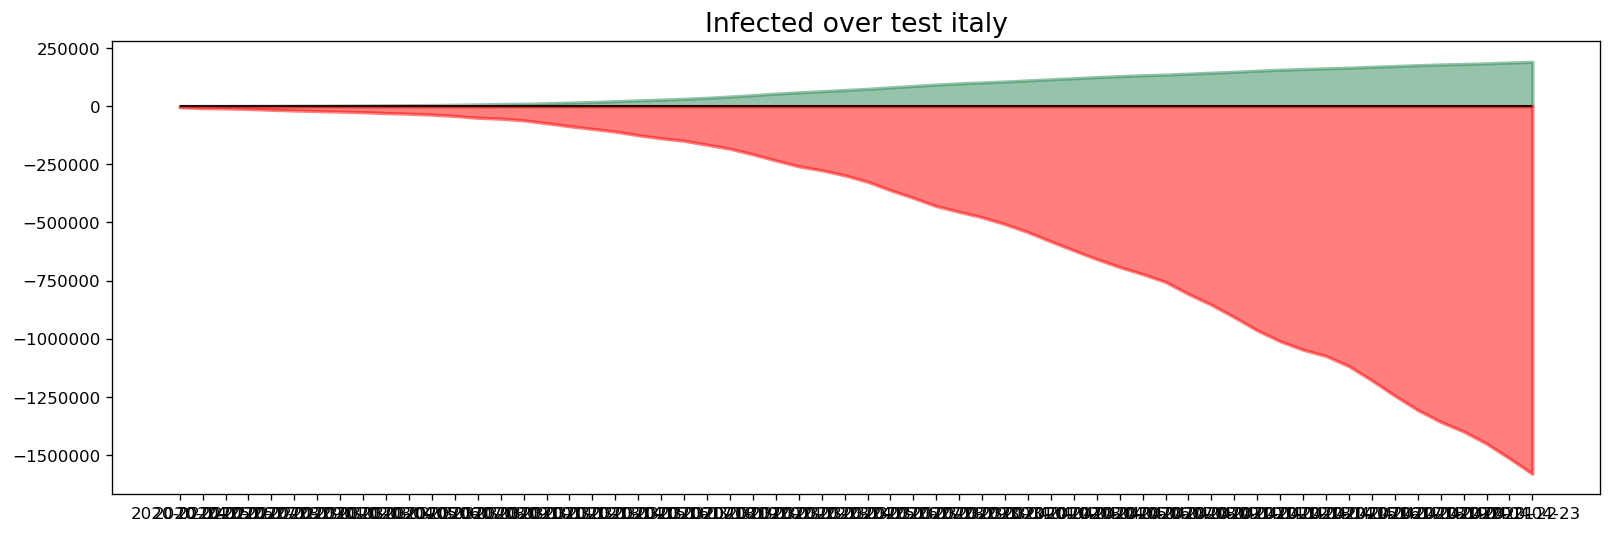

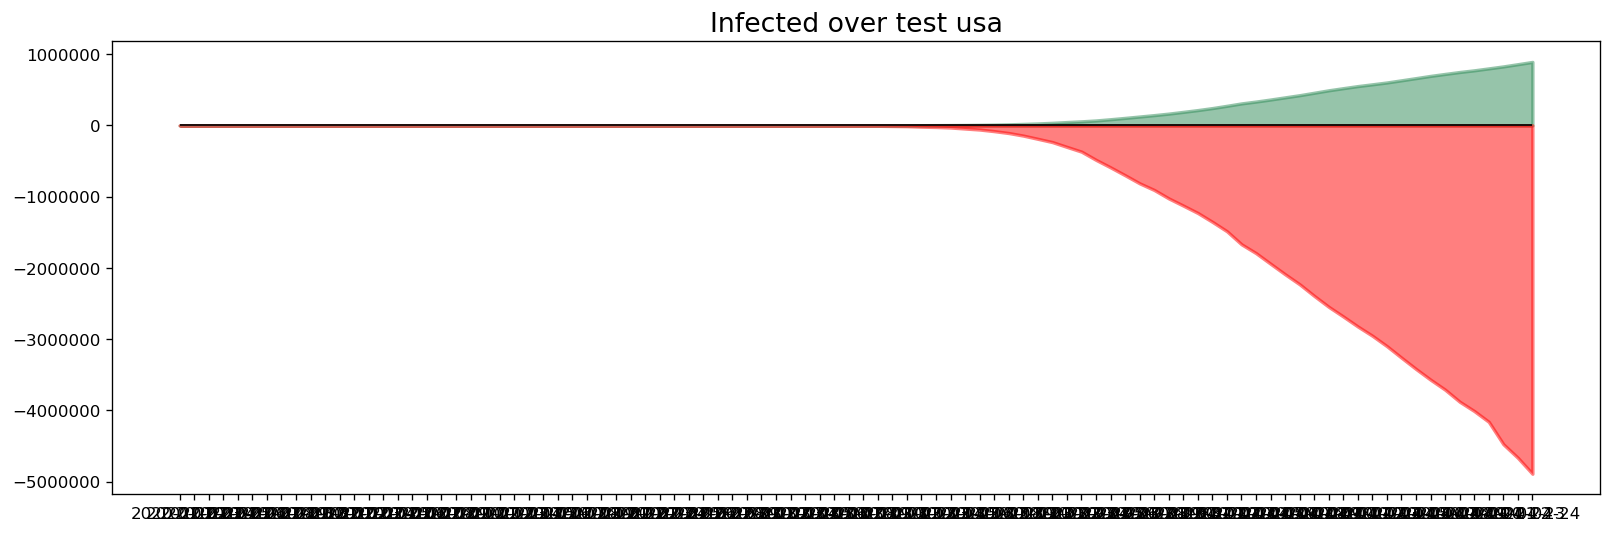

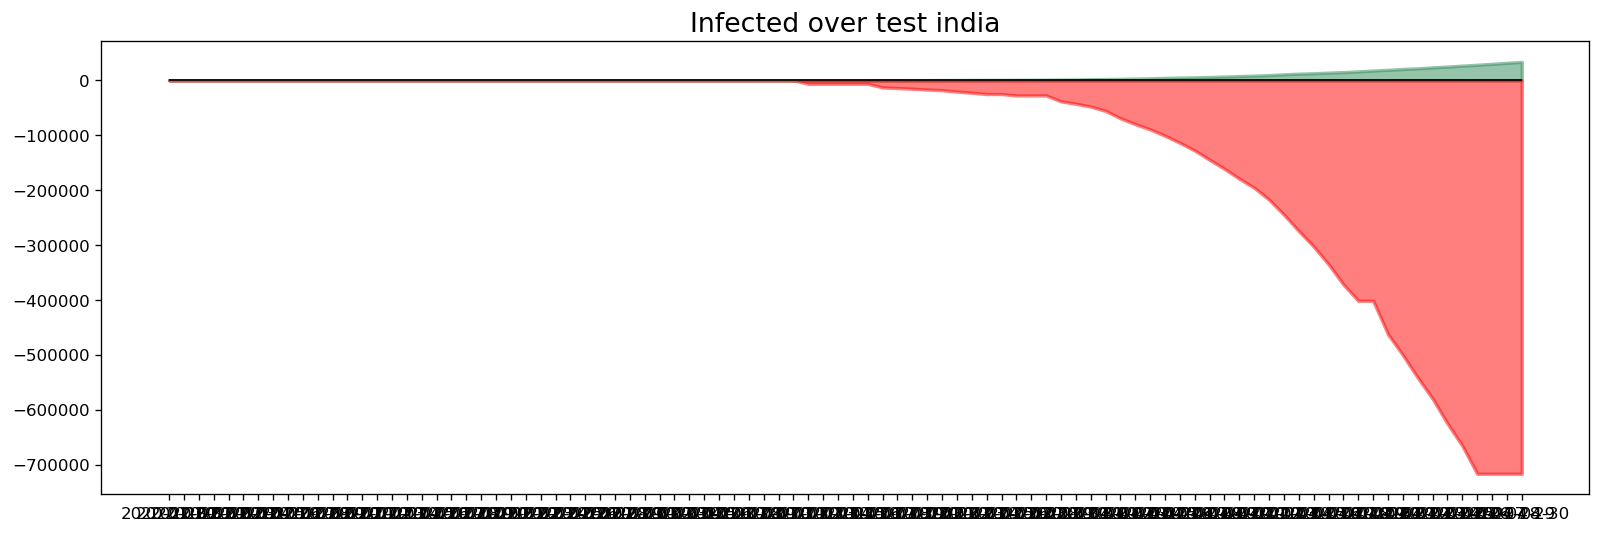

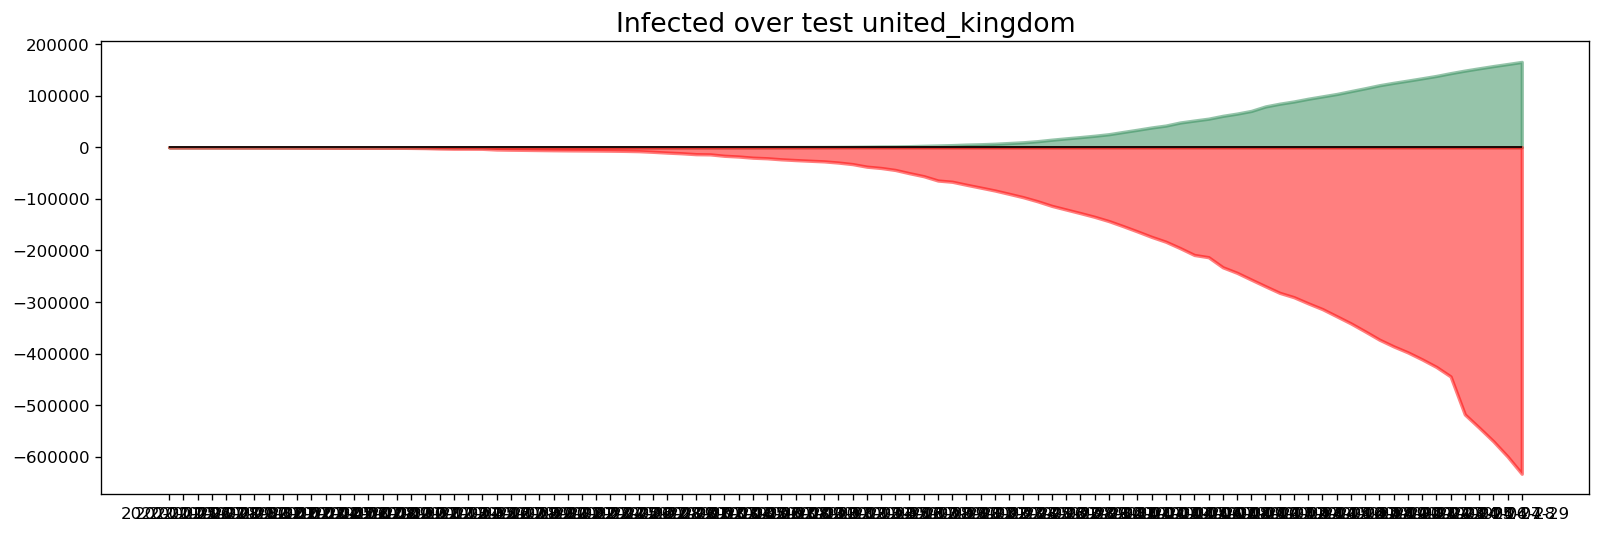

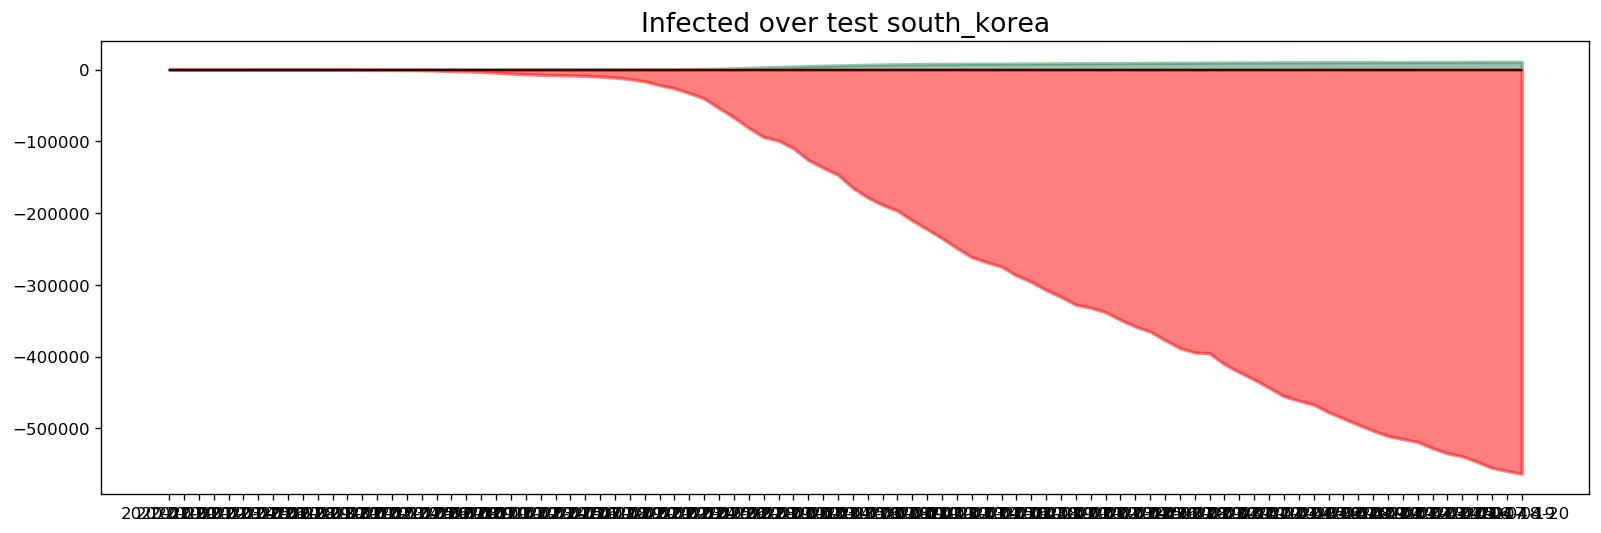

In [13]:
for state in state_csv:
    x = state_csv[state].index
    y1 = state_csv[state].total_cases.values
    y2 = state_csv[state].total_test.values
            
    fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
    plt.fill_between(x, y1=y1,  alpha=0.5, linewidth=2, color='seagreen')
    plt.fill_between(x, y1=-y2, alpha=0.5, linewidth=2, color='red')
    plt.title('Infected over test ' + state, fontsize=16)
    plt.hlines(y=0, xmin=np.min(state_csv[state].index), xmax=np.max(state_csv[state].index), linewidth=1)
    plt.show()

# Lags analisys

<ul>
<li> Comparison between number of test performed each week</li>
<li> Compare time <b>t</b> with <b>t + x</b> for the number of test performed every week </li>
 </ul>

In [14]:
%cd ..
%run -i ts.py

import numpy as np
import pandas as pd
import seaborn as sns

test = state_csv["italy"]
newindex = pd.DatetimeIndex(test.index)
test.index = newindex

/Users/andre/Desktop/University/Masters/Second year/Second semester/Data Science for business/Lezioni/4° Lezione - 1° Lab/datasciencebusiness


## Quantitave analisys on test performed

<p>Weekly box graph of test performed</p>

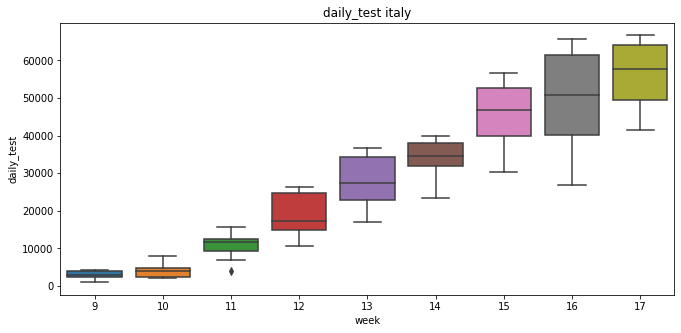

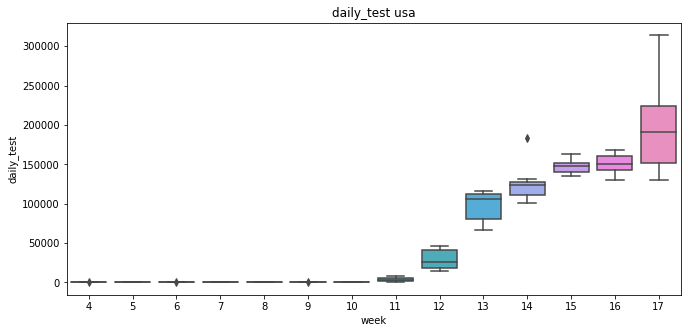

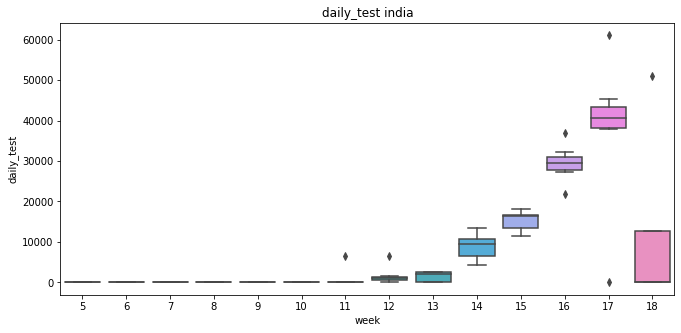

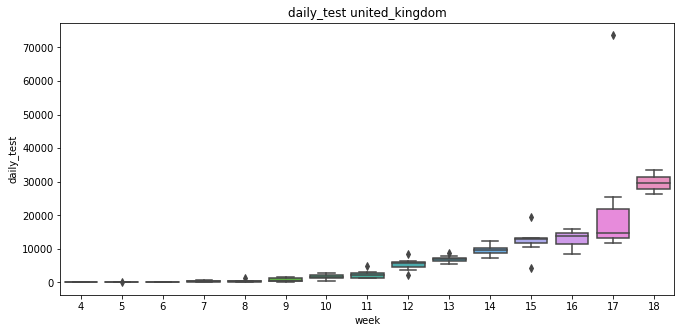

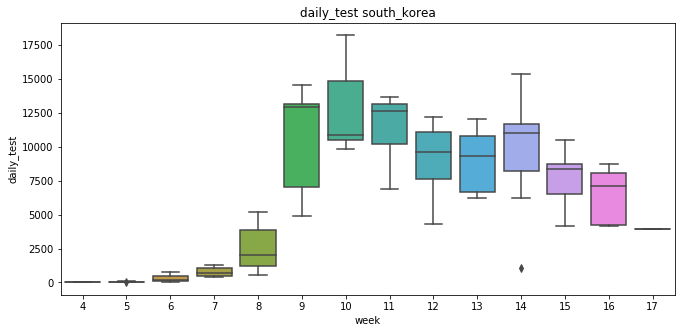

In [15]:
for state in state_csv:
    dummystate = state_csv[state]
    newindex = pd.DatetimeIndex(dummystate.index)
    dummystate.index = newindex
    plot_interval(dummystate, state, ['daily_test'], 'week')

Comparazione del numero di test effettuati giornamente tra settimana <b>x</b> e settimana <b>x + t</b>, consideranto un range di 4 settimane

Gli stati uniti hanno avuto un andamento dei test effettuati giornamente più linere rispetto agli altri paesi

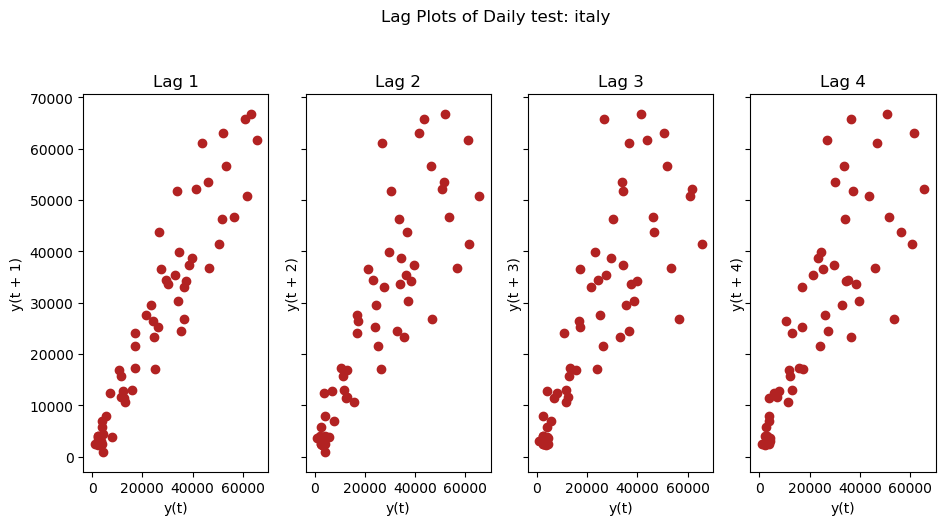

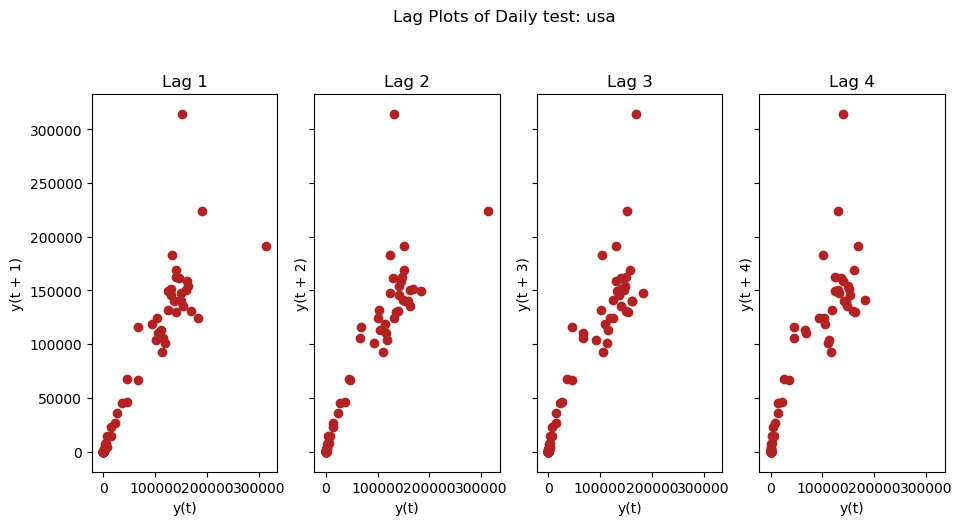

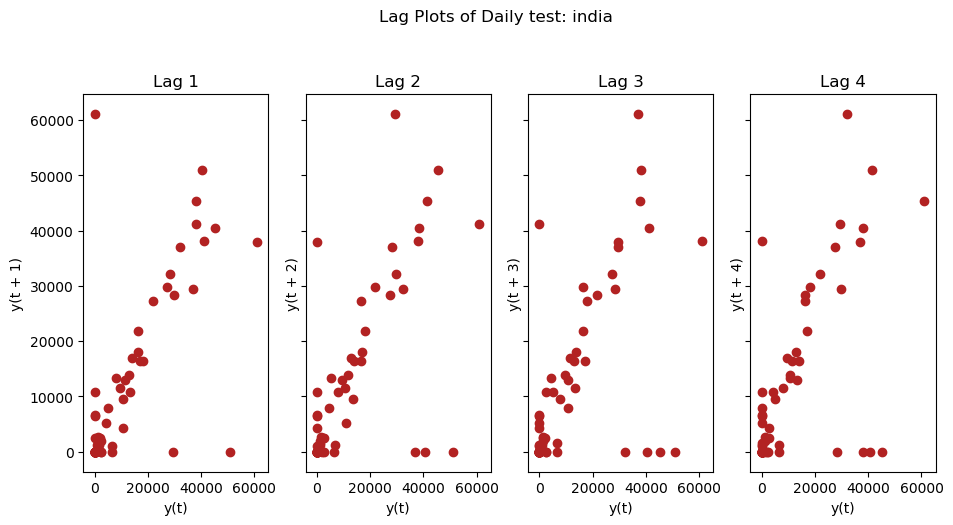

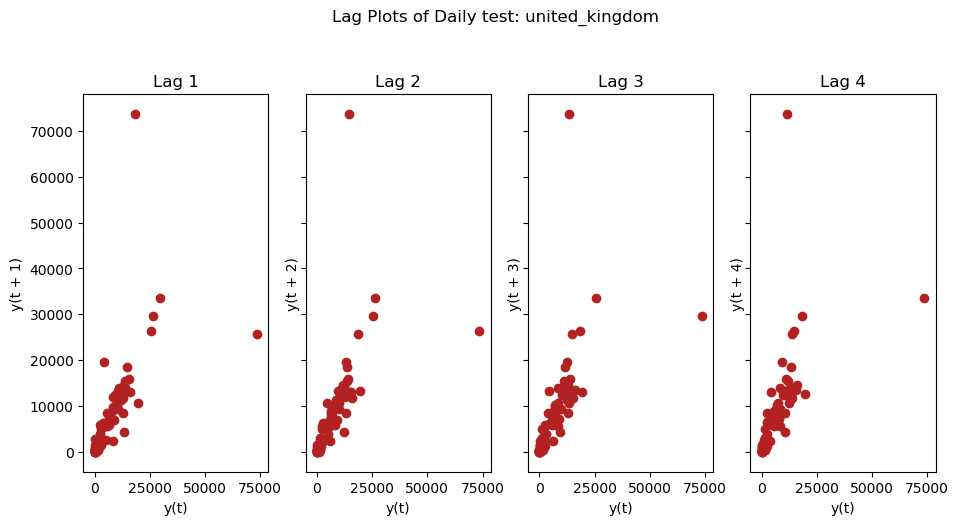

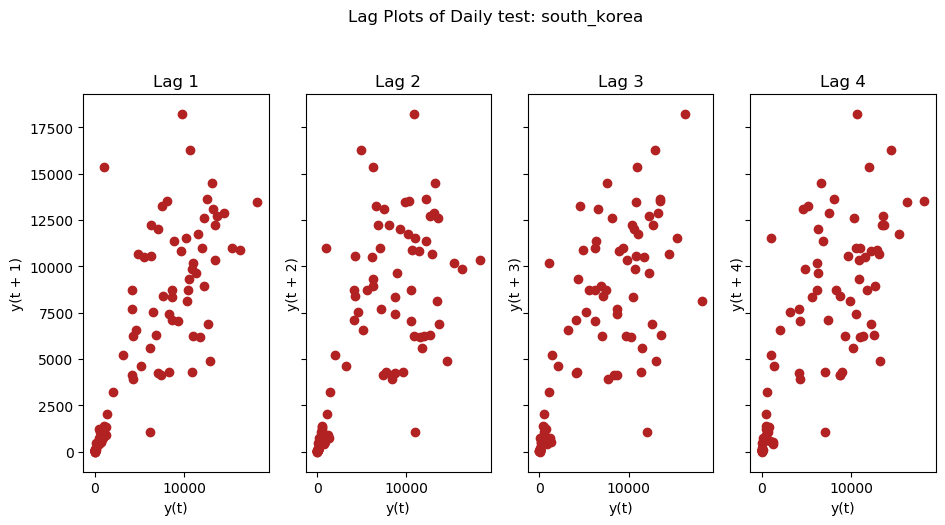

In [16]:
from pandas.plotting import lag_plot

for state in state_csv:
    fig, axes = plt.subplots(1, 4, figsize=(11,5), sharex=True, sharey=True, dpi=100)
    for i, ax in enumerate(axes.flatten()[:4]):
        lag_plot(state_csv[state].daily_test, lag=i+1, ax=ax, c='firebrick')
        ax.set_title('Lag ' + str(i+1))

    fig.suptitle('Lag Plots of Daily test: ' + state, y=1.05)    
    plt.show()

## Autocorrelation of daily test

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


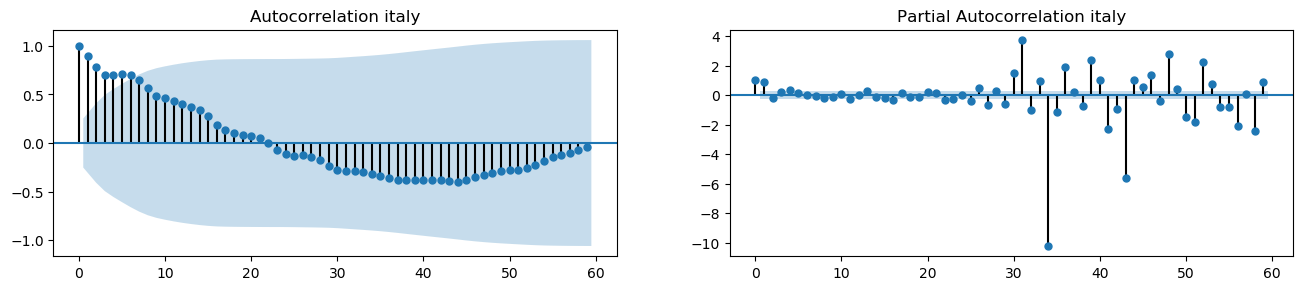

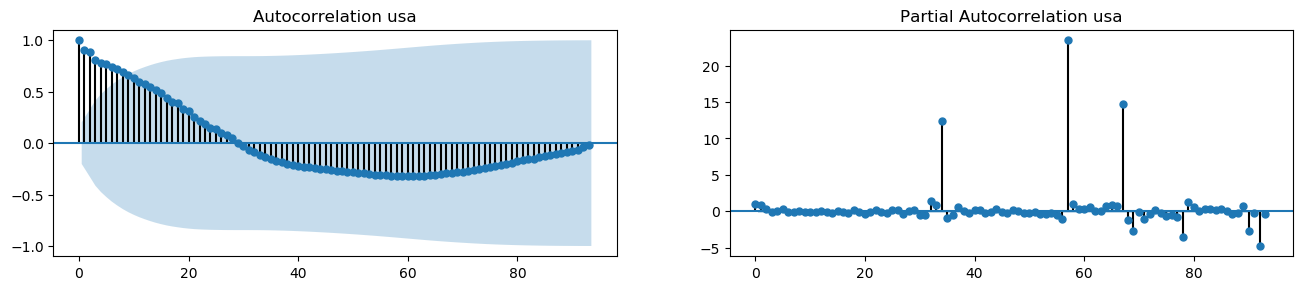

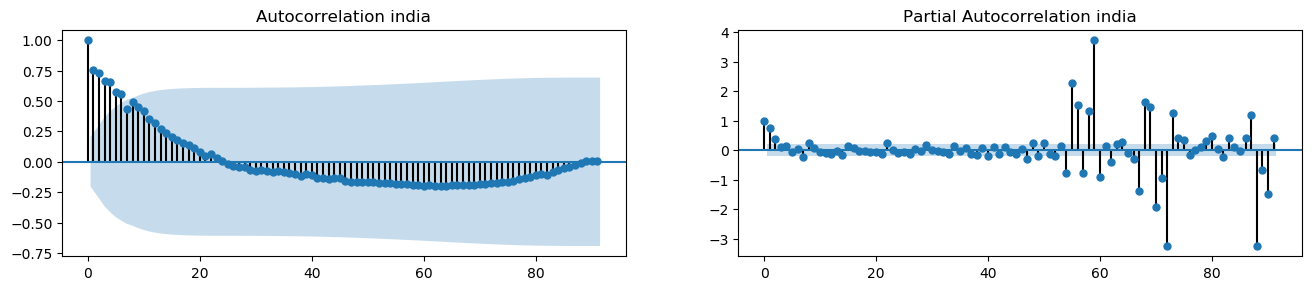

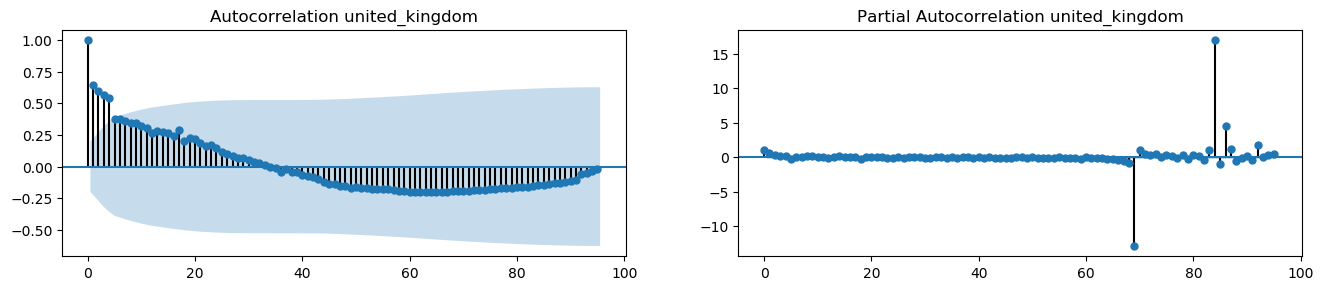

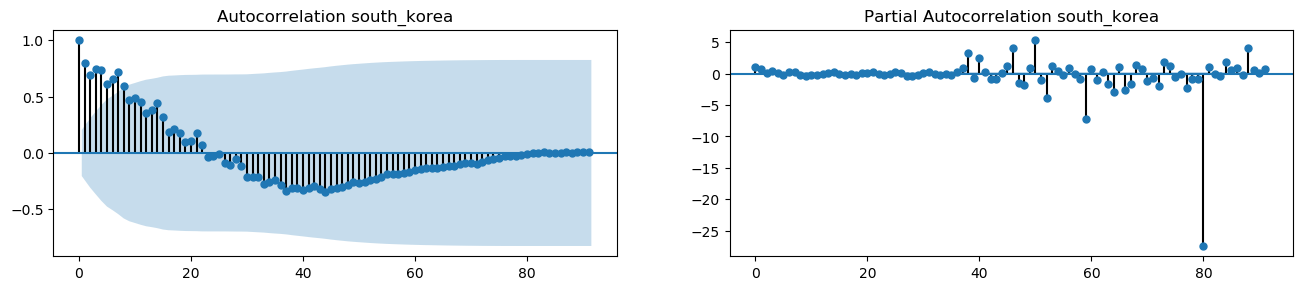

In [17]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for state in state_csv:
    fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
    plot_acf(state_csv[state].daily_test.tolist(), lags=len(state_csv[state].index)-1, ax=axes[0], title= "Autocorrelation " + state)
    plot_pacf(state_csv[state].daily_test.tolist(), lags=len(state_csv[state].index)-1, ax=axes[1], title= "Partial Autocorrelation " + state)

 ## Stationarity analisys

In [18]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, state):
    """
    Check Stationariety of time series.
    Please use np.array or pd.series as Input with your TS data only
    """
    #Convert numpy array to pandas serie
    if type(timeseries) is np.ndarray:
        df_timeseries = pd.Series(timeseries) 
        
    try:
        #Determing rolling statistics
        rolmean = df_timeseries.rolling(window=12).mean()
        rolstd = df_timeseries.rolling(window=12).std()

        #Plot rolling statistics:
        orig = plt.plot(timeseries, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation of ' + state)
        plt.show(block=False)

        #Perform Dickey-Fuller test:
        print('Results of Dickey-Fuller Test:')

        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        
        # print(dfoutput)
    
        return dftest, dfoutput
    except Exception as message:
        print(f"Impossible to calc the stationariery of your TS: {message}")
        return None, None

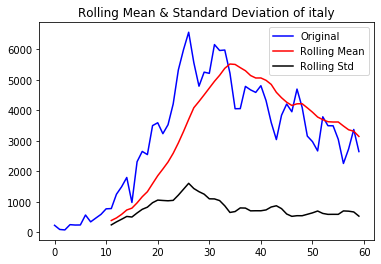

Results of Dickey-Fuller Test:


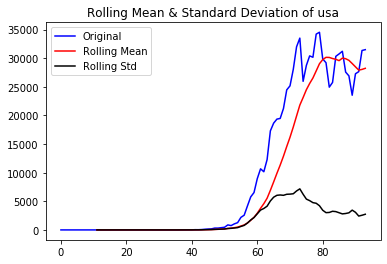

Results of Dickey-Fuller Test:


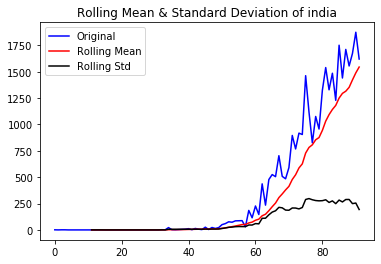

Results of Dickey-Fuller Test:


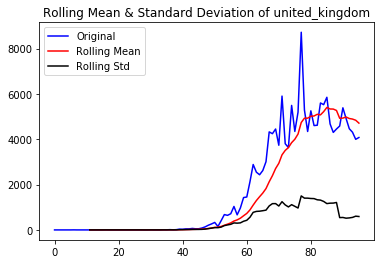

Results of Dickey-Fuller Test:


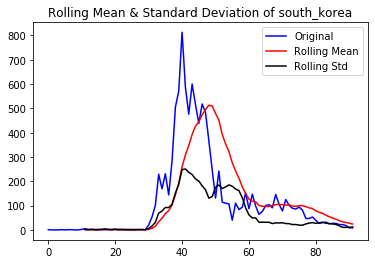

Results of Dickey-Fuller Test:


In [19]:
for state in state_csv:
    dftest, dfoutput = test_stationarity(state_csv[state].daily_cases.values, state)

## Daily cases

<p>Now that we have see the behaviour of each country about the test let's see how infected found evolved during time<p>
<ul>
    <li> The first vertical line indicate the beginning of the state of quarantine </li>
    <li> The second vertical line indicate approximately the 15 days of incubation time </li>
</ul>

### Note: Nations that didn't start a complete level of lockdown

<p>On 27 March, dozens of <b>Indonesian</b> medical professors have called for “local lockdowns”, saying that the government's policy of physical distancing is not “effective”, so we estimate that as a started date.</p>

<p>The rapid and extensive tests taken by <b>South Korea</b> have been judged successful in limiting the spread of the outbreak, without using the drastic measure of quarantining entire cities. As of 25 February, Daegu officials were aggressively warning residents to take precautions, while allowing private businesses such as restaurants to stay open, we use that date as a started date.
</p>

In [20]:
#Divieto spostamenti non essenziali
#Level 0 no-lockdown
#Level 1 Mass screening and isolate who has been in contact with infected
#Level 2 Max level of lockdown
level_1_of_lockdown = {"india": datetime.datetime(2020,3,22),
                     "italy": datetime.datetime(2020,2,21),
                     "indonesia": datetime.datetime(2020,3,15),
                     "south_korea": datetime.datetime(2020,2,25),
                     "united_kingdom": datetime.datetime(2020,3,16),
                     "usa":datetime.datetime(2020,3,13)} #Mean

level_2_of_lockdown = {"india": datetime.datetime(2020,3,24),
                     "italy": datetime.datetime(2020,3,9),
                     "united_kingdom": datetime.datetime(2020,3,23),
                     "usa":datetime.datetime(2020,3,20),
                     "indonesia": None,
                     "south_korea": None}
#Chiusura scuole
school_closure = {"india": datetime.datetime(2020,3,17),
                     "italy": datetime.datetime(2020,2,23),
                     "indonesia": datetime.datetime(2020,3,16),
                     "south_korea": datetime.datetime(2020,3,2),
                     "united_kingdom": datetime.datetime(2020,3,20),
                     "usa":datetime.datetime(2020,3,16)}


#INCUBATION TIME
INC_TIME = timedelta(days=15)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


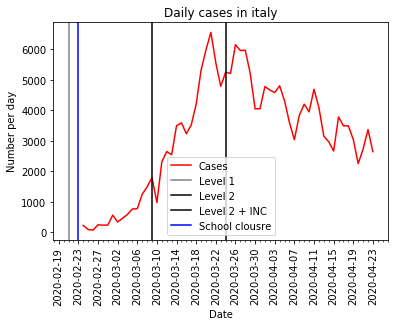

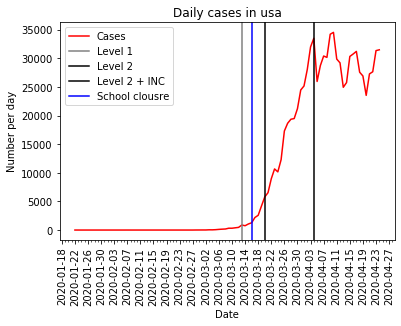

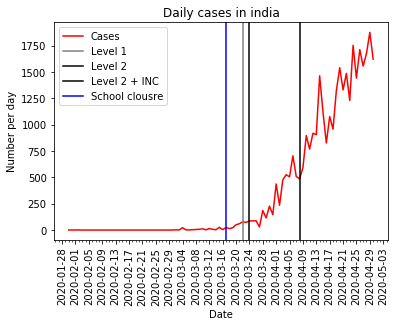

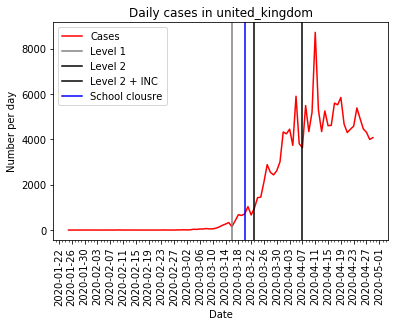

Not found


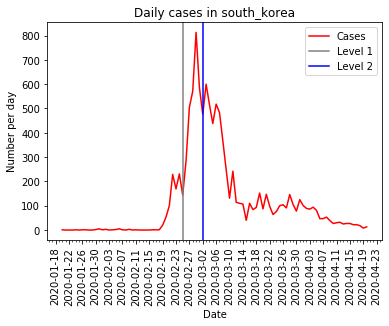

In [21]:
import matplotlib.dates as mdates

for state in states:
    plt.title('Daily cases in ' + state)
    plt.plot(state_csv[state].index, state_csv[state].daily_cases, 'r')

    plt.axvline(level_1_of_lockdown[state], 0, 1, color = "grey")
    try:
        plt.axvline(level_2_of_lockdown[state], 0, 1, color = "k")
        plt.axvline(level_2_of_lockdown[state]+INC_TIME, 0, 1, color = "k")
    except:
        print("Not found")
    
    plt.axvline(school_closure[state], 0, 1, color = "blue")

    plt.setp(plt.gca().xaxis.get_majorticklabels(),rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))
    plt.gca().xaxis.set_minor_locator(mdates.DayLocator())

    plt.xlabel('Date')
    plt.ylabel('Number per day')
    plt.legend(["Cases", "Level 1", "Level 2", "Level 2 + INC", "School clousre"])
    plt.show()

# Build dataframe for Alg

<p>Starting with the dataframe foreach country that we used for make the analisys we build a new dataframe with more features and selecting only the features available foreach country.</p>

## New temporal features
<p>We want to give a stress on <b>WHEN</b> the our record are beloging to, in this way we suppose to give more tools to our alg for identify and discriminate the data using time, following features will be added:
</p>
<ul>
    <li> day_zero, when the country has reached 100 cases of infected </li>
    <li> delta_day_zero, the days delta between record date and country day_zero </li>
    <li> week_year, number of the week record date belonging to </li>
    <li> day_year, number of the day record date belonging to </li>
    <li> day_week, number of the weekday record date belonging to </li>
    <li> day_week_sin, since day_week is ciclic value we need this trasformation for compute distance between record </li>
    <li> day_week_cos, since day_week is ciclic value we need this trasformation for compute distance between record </li>
    <li> lockdown_meter TODO</li>
</ul>

In [22]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(d2, "%Y-%m-%d")
    return abs((d2 - d1).days)

In [23]:

#data = pd.date_range('2020-01-01', periods=1, freq='D')
mgc = pd.DataFrame()

for state in states:
    temp = state_csv[state].copy()
    day_zero = temp.total_cases[temp["total_cases"]>100].index[0]
    temp["delta_day_zero"] = (temp.index-day_zero).days
    temp["country"] = state
    pop_sts = population[population["AgeGrp"]=="0-100"]
    pop = (pop_sts[pop_sts.index.values == state].PopTotal.values[0]*1000).round(0)
    temp["population"] = int(pop)
    temp = [temp, mgc]
    mgc = pd.concat(temp , sort=True)
    
mgc = mgc.dropna(axis = 1)
mgc
#mgc.loc[:,mgc.isnull().any()]


,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test
date,,,,,,,,,
2020-01-20,south_korea,1,0,0,-31,51269183,1,0,1
2020-01-21,south_korea,0,0,0,-30,51269183,1,0,1
2020-01-22,south_korea,0,0,3,-29,51269183,1,0,4
2020-01-23,south_korea,0,0,18,-28,51269183,1,0,22
2020-01-24,south_korea,1,0,5,-27,51269183,2,0,27
...,...,...,...,...,...,...,...,...,...
2020-04-19,italy,3047,433,50708,55,60461828,178972,23660,1356541
2020-04-20,italy,2256,454,41483,56,60461828,181228,24114,1398024
2020-04-21,italy,2729,534,52126,57,60461828,183957,24648,1450150


In [24]:
mgc['week_year'] = mgc.index.strftime("%W")
mgc['day_year'] = mgc.index.strftime("%-j")
mgc['day_week'] = mgc.index.strftime("%w")

mgc


,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,day_year,day_week
date,,,,,,,,,,,,
2020-01-20,south_korea,1,0,0,-31,51269183,1,0,1,03,20,1
2020-01-21,south_korea,0,0,0,-30,51269183,1,0,1,03,21,2
2020-01-22,south_korea,0,0,3,-29,51269183,1,0,4,03,22,3
2020-01-23,south_korea,0,0,18,-28,51269183,1,0,22,03,23,4
2020-01-24,south_korea,1,0,5,-27,51269183,2,0,27,03,24,5
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-19,italy,3047,433,50708,55,60461828,178972,23660,1356541,15,110,0
2020-04-20,italy,2256,454,41483,56,60461828,181228,24114,1398024,16,111,1
2020-04-21,italy,2729,534,52126,57,60461828,183957,24648,1450150,16,112,2


In [25]:
mgc['day_week_sin'] = np.sin(2 * np.pi * mgc['day_week'].astype(int)/6.0)
mgc['day_week_cos'] = np.cos(2 * np.pi * mgc['day_week'].astype(int)/6.0)

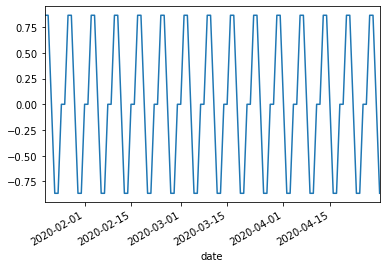

In [26]:
ax = mgc['day_week_sin'].plot()

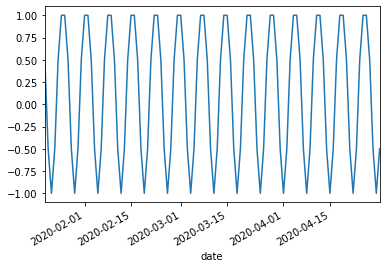

In [27]:
ax = mgc['day_week_cos'].plot()

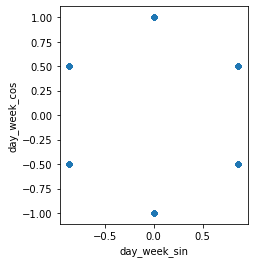

In [28]:
ax = mgc.plot.scatter('day_week_sin', 'day_week_cos').set_aspect('equal')

## Country related features

<p>Since we are dealing with data belonging from some different state we'll add some features about the trait of each country, then we compute some other using country data and epidemic data of that country, following features will be added:</p> 

<ul>
    <li> population, country population</li>
    <li> total_test_pc, total_test / population </li>
    <li> daily_test_pc, daily_test / population </li>
    <li> total_cases_pc, total_cases / population </li>
    <li> daily_cases_pc, daily_cases / population </li>
    <li> total_dead_pc, total_dead / population </li>
    <li> daily_dead_pc, daily_dead / population </li>
    <li> lethality, total_dead / total_cases </li>
    <li> GDP_pc, country GDP / population</li>
</ul>

In [29]:
col_pc = ["total_test_pc","daily_test_pc","total_cases_pc","daily_cases_pc", "total_dead_pc","daily_dead_pc","lethality","GDP_pc"]
mgc = mgc.reindex(columns=mgc.columns.tolist() + col_pc)
    
for i in range(len(mgc.index)):
    pop = mgc.iloc[i, mgc.columns.get_loc("population")]
    mgc.iloc[i, mgc.columns.get_loc("total_test_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_test")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_test_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_test")]/pop
    mgc.iloc[i, mgc.columns.get_loc("total_cases_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_cases")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_cases_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_cases")]/pop
    mgc.iloc[i, mgc.columns.get_loc("total_dead_pc")] = mgc.iloc[i, mgc.columns.get_loc("total_dead")]/pop
    mgc.iloc[i, mgc.columns.get_loc("daily_dead_pc")] = mgc.iloc[i, mgc.columns.get_loc("daily_dead")]/pop
    if mgc.iloc[i, mgc.columns.get_loc("total_dead")] > 0:
        mgc.iloc[i, mgc.columns.get_loc("lethality")] = mgc.iloc[i, mgc.columns.get_loc("total_dead")] / mgc.iloc[i, mgc.columns.get_loc("total_cases")]
    else:
        mgc.iloc[i, mgc.columns.get_loc("lethality")] = 0
    mgc.iloc[i, mgc.columns.get_loc("GDP_pc")] = (gdp[gdp.index.values == mgc.iloc[i, mgc.columns.get_loc("country")]]/pop).values[0][0]

# TEST drop data before day 0

In [30]:
mgc = mgc[mgc["delta_day_zero"] >= 0]
mgc

,country,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,...,day_week_sin,day_week_cos,total_test_pc,daily_test_pc,total_cases_pc,daily_cases_pc,total_dead_pc,daily_dead_pc,lethality,GDP_pc
date,,,,,,,,,,,,,,,,,,,,,
2020-02-20,south_korea,53,1,2029,0,51269183,104,1,13202,07,...,-8.660254e-01,-0.5,0.000258,0.000040,0.000002,0.000001,1.950489e-08,1.950489e-08,0.009615,31586.688268
2020-02-21,south_korea,100,1,3198,1,51269183,204,2,16400,07,...,-8.660254e-01,0.5,0.000320,0.000062,0.000004,0.000002,3.900979e-08,1.950489e-08,0.009804,31586.688268
2020-02-22,south_korea,229,0,5186,2,51269183,433,2,21586,07,...,-2.449294e-16,1.0,0.000421,0.000101,0.000008,0.000004,3.900979e-08,0.000000e+00,0.004619,31586.688268
2020-02-23,south_korea,169,4,4593,3,51269183,602,6,26179,07,...,0.000000e+00,1.0,0.000511,0.000090,0.000012,0.000003,1.170294e-07,7.801958e-08,0.009967,31586.688268
2020-02-24,south_korea,231,2,6577,4,51269183,833,8,32756,08,...,8.660254e-01,0.5,0.000639,0.000128,0.000016,0.000005,1.560392e-07,3.900979e-08,0.009604,31586.688268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-19,italy,3047,433,50708,55,60461828,178972,23660,1356541,15,...,0.000000e+00,1.0,0.022436,0.000839,0.002960,0.000050,3.913213e-04,7.161543e-06,0.132199,34465.783264
2020-04-20,italy,2256,454,41483,56,60461828,181228,24114,1398024,16,...,8.660254e-01,0.5,0.023122,0.000686,0.002997,0.000037,3.988302e-04,7.508870e-06,0.133059,34465.783264
2020-04-21,italy,2729,534,52126,57,60461828,183957,24648,1450150,16,...,8.660254e-01,-0.5,0.023985,0.000862,0.003043,0.000045,4.076622e-04,8.832019e-06,0.133988,34465.783264


In [31]:
#Insert in the DataFrame the level of lockdown for each day and if school were closed or not
col_lockdown = ["level_of_lockdown","school_closure"]
mgc = mgc.reindex(columns=mgc.columns.tolist() + col_lockdown)

## Level of lockdown

In [32]:
for i in range(len(mgc.index)):
    country = mgc.iloc[i, mgc.columns.get_loc("country")]
    date = mgc.index[i].to_pydatetime()
    if(date < level_1_of_lockdown[country]):
        mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 0
    elif(level_2_of_lockdown[country] is not None):
        if(date < level_2_of_lockdown[country]):
            mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 1
        else:
            mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 2 
    else:
        mgc.iloc[i, mgc.columns.get_loc("level_of_lockdown")] = 1

## School closure

In [33]:
for i in range(len(mgc.index)):
    country = mgc.iloc[i, mgc.columns.get_loc("country")]
    date = mgc.index[i].to_pydatetime()
    if(date < school_closure[country]):
        mgc.iloc[i, mgc.columns.get_loc("school_closure")] = 0
    else:
        mgc.iloc[i, mgc.columns.get_loc("school_closure")] = 1

## Dummizzation of country name feature

In [35]:
mgc = pd.get_dummies(mgc,
                   columns=['country'])

## Prescaling of features values

In [36]:
from sklearn import preprocessing

temp_mgc = mgc.copy()

transf = preprocessing.MinMaxScaler().fit(temp_mgc)
temp_mgc = transf.transform(temp_mgc)
temp_mgc = pd.DataFrame(temp_mgc)

temp_mgc

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.001419,0.000374,0.006465,0.000000,0.000000,0.000000,0.000022,0.002482,0.0,0.000000,...,0.001130,0.060364,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.002779,0.000374,0.010190,0.016667,0.000000,0.000112,0.000044,0.003137,0.0,0.014286,...,0.001130,0.061548,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.006514,0.000000,0.016524,0.033333,0.000000,0.000369,0.000044,0.004198,0.0,0.028571,...,0.000000,0.028997,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.004777,0.001496,0.014635,0.050000,0.000000,0.000559,0.000131,0.005138,0.0,0.042857,...,0.004519,0.062570,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.006572,0.000748,0.020956,0.066667,0.000000,0.000818,0.000175,0.006483,0.1,0.057143,...,0.002260,0.060291,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.088103,0.161930,0.161571,0.916667,0.006918,0.200815,0.516752,0.277355,0.8,0.842857,...,0.414820,0.829928,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
272,0.065202,0.169783,0.132178,0.933333,0.006918,0.203347,0.526668,0.285843,0.9,0.857143,...,0.434938,0.835324,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
273,0.078896,0.199701,0.166089,0.950000,0.006918,0.206411,0.538330,0.296509,0.9,0.871429,...,0.511579,0.841156,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
274,0.097455,0.163426,0.201059,0.966667,0.006918,0.210195,0.547875,0.309421,0.9,0.885714,...,0.418652,0.840668,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [37]:
temp_mgc.columns = mgc.columns.tolist()

temp_mgc


,daily_cases,daily_dead,daily_test,delta_day_zero,population,total_cases,total_dead,total_test,week_year,day_year,...,daily_dead_pc,lethality,GDP_pc,level_of_lockdown,school_closure,country_india,country_italy,country_south_korea,country_united_kingdom,country_usa
0,0.001419,0.000374,0.006465,0.000000,0.000000,0.000000,0.000022,0.002482,0.0,0.000000,...,0.001130,0.060364,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.002779,0.000374,0.010190,0.016667,0.000000,0.000112,0.000044,0.003137,0.0,0.014286,...,0.001130,0.061548,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.006514,0.000000,0.016524,0.033333,0.000000,0.000369,0.000044,0.004198,0.0,0.028571,...,0.000000,0.028997,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.004777,0.001496,0.014635,0.050000,0.000000,0.000559,0.000131,0.005138,0.0,0.042857,...,0.004519,0.062570,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.006572,0.000748,0.020956,0.066667,0.000000,0.000818,0.000175,0.006483,0.1,0.057143,...,0.002260,0.060291,0.492814,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.088103,0.161930,0.161571,0.916667,0.006918,0.200815,0.516752,0.277355,0.8,0.842857,...,0.414820,0.829928,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
272,0.065202,0.169783,0.132178,0.933333,0.006918,0.203347,0.526668,0.285843,0.9,0.857143,...,0.434938,0.835324,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
273,0.078896,0.199701,0.166089,0.950000,0.006918,0.206411,0.538330,0.296509,0.9,0.871429,...,0.511579,0.841156,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0
274,0.097455,0.163426,0.201059,0.966667,0.006918,0.210195,0.547875,0.309421,0.9,0.885714,...,0.418652,0.840668,0.540721,1.0,1.0,0.0,1.0,0.0,0.0,0.0


# Clustering

In [38]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

def doKMeans(df, columns, x, y):
    # Let's plot your data with a '.' marker, a 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(111)
    ax.scatter(x, y, marker='.', c='navy', alpha=0.8)
    
    # TODO: Filter `df` using indexing so it only contains Longitude and Latitude,
    # since the remaining columns aren't really applicable for this lab:
    df = df.loc[:, columns]
    
    # TODO: Use K-Means to try and find seven cluster centers in this df.
    # Be sure to name your kmeans model `model` so that the printing works.
    #
    model = KMeans(n_clusters=5)
    model.fit(df)
    KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
    
    # Now we can print and plot the centroids:
    centroids = model.cluster_centers_
    print(centroids)
    ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='red', alpha=0.8, linewidths=3, s=169)


In [39]:
columns = ['delta_day_zero',
       'day_year', 'total_test_pc',
       'daily_test_pc', 'total_cases_pc', 'daily_cases_pc', 'total_dead_pc',
       'daily_dead_pc', 'GDP_pc']
temp_mgc2 = temp_mgc.loc[:, columns]
temp_mgc2.columns

Index(['delta_day_zero', 'day_year', 'total_test_pc', 'daily_test_pc',
       'total_cases_pc', 'daily_cases_pc', 'total_dead_pc', 'daily_dead_pc',
       'GDP_pc'],
      dtype='object')

In [40]:
inertia = []

list_k = list(range(1,10))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(temp_mgc2)
    inertia.append(kmeans_test.inertia_)
    

Text(0, 0.5, 'Sum of squared distance')

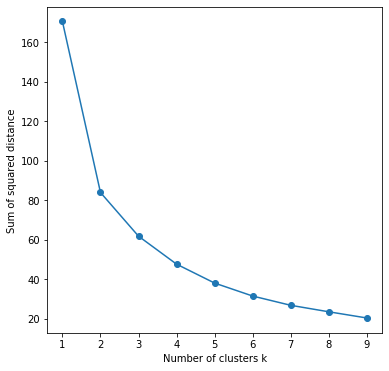

In [41]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

For n_clusters = 2 The average silhouette_score is : 0.47808362414260946
For n_clusters = 3 The average silhouette_score is : 0.3987082841090605
For n_clusters = 4 The average silhouette_score is : 0.38156123285325766
For n_clusters = 5 The average silhouette_score is : 0.42391005274148463
For n_clusters = 6 The average silhouette_score is : 0.4471065970126491
For n_clusters = 7 The average silhouette_score is : 0.4324670654787711
For n_clusters = 8 The average silhouette_score is : 0.4289322041778097
For n_clusters = 9 The average silhouette_score is : 0.44343014123795793
For n_clusters = 10 The average silhouette_score is : 0.43736526955241073


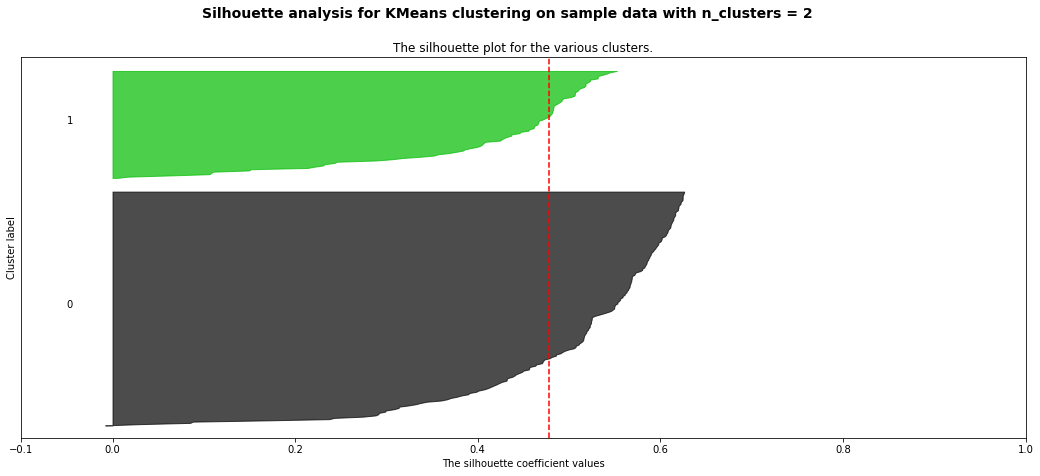

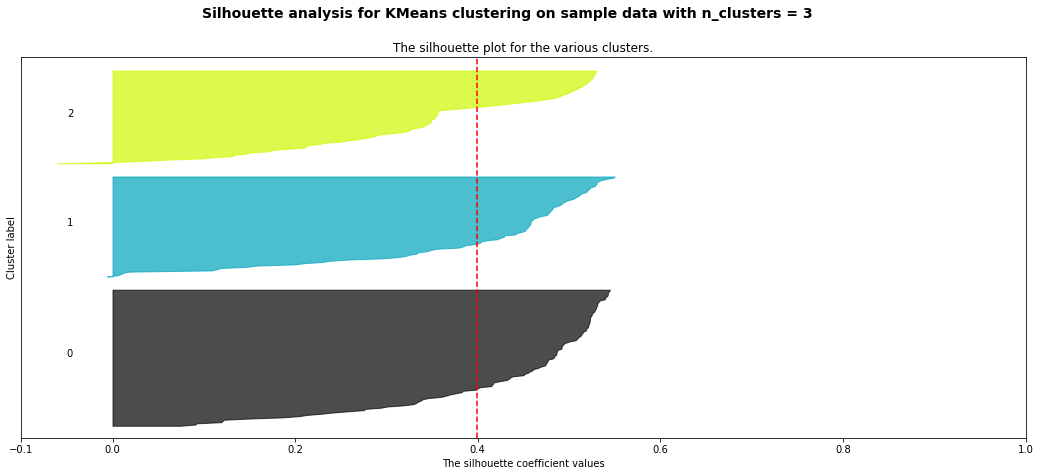

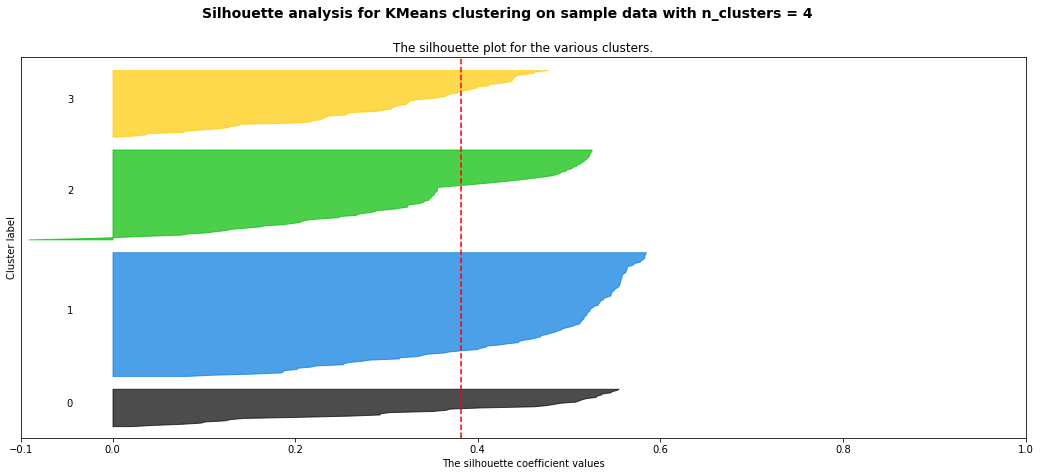

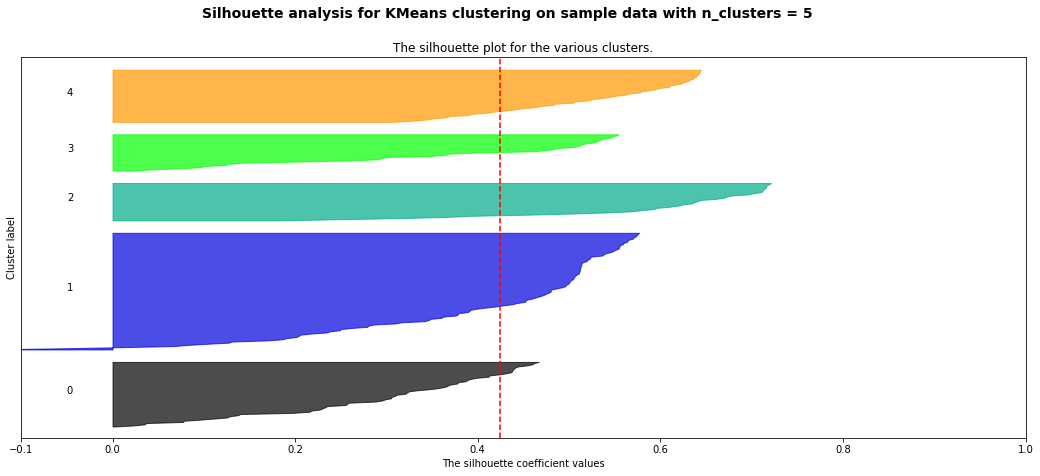

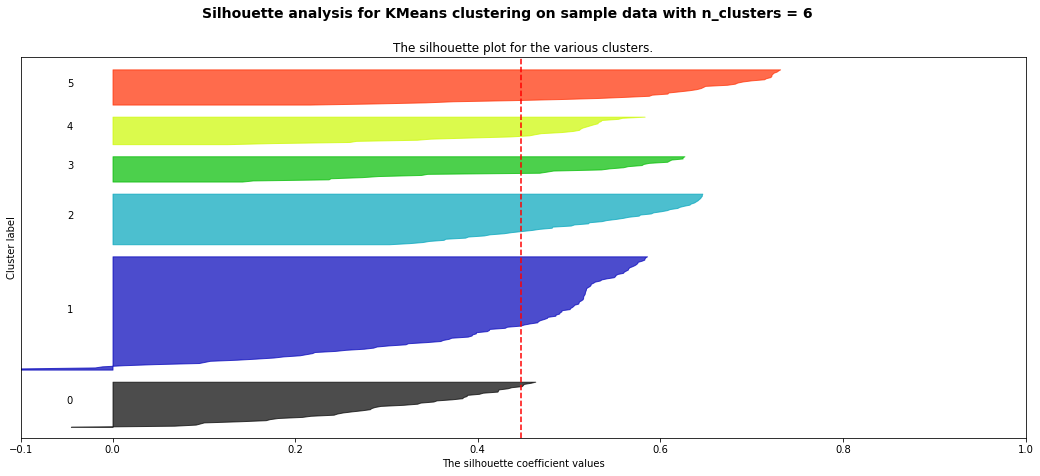

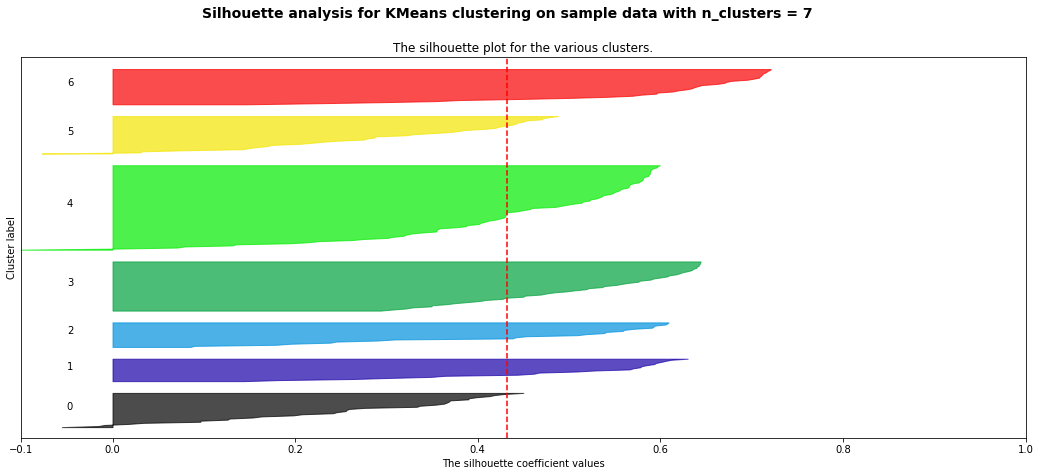

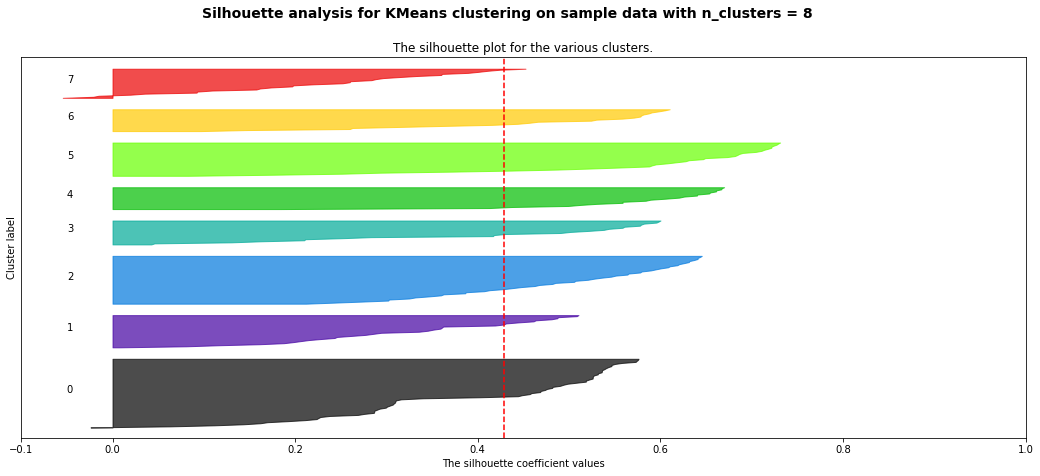

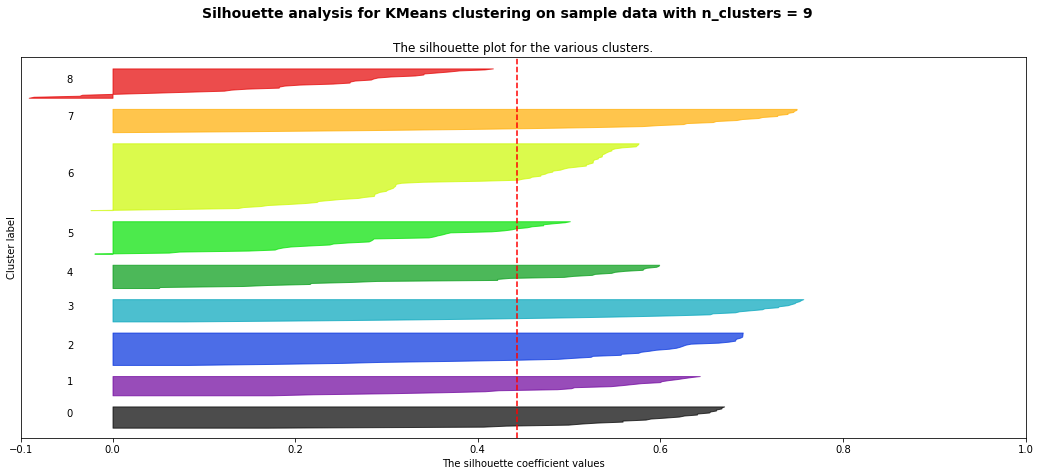

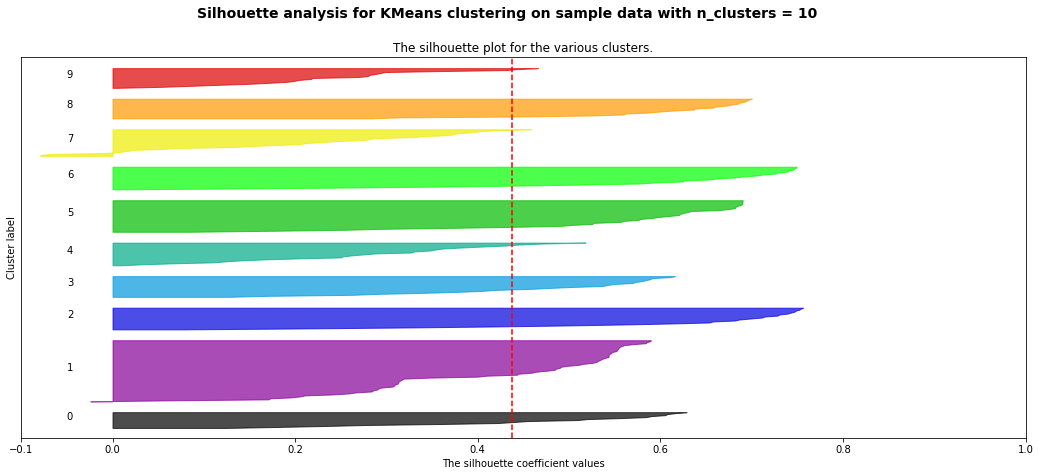

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots()
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(temp_mgc2) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(temp_mgc2)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(temp_mgc2, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(temp_mgc2, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



In [43]:
kmeans_test = KMeans(n_clusters=3)
kmeans_test.fit(temp_mgc2)
temp_mgc["labels"] = kmeans_test.labels_

In [44]:
temp_india = temp_mgc[temp_mgc["country_india"] == 1.0]
temp_italy = temp_mgc[temp_mgc["country_italy"] == 1.0]
temp_south_korea = temp_mgc[temp_mgc["country_south_korea"] == 1.0]
temp_united_kingdom = temp_mgc[temp_mgc["country_united_kingdom"] == 1.0]
temp_usa = temp_mgc[temp_mgc["country_usa"] == 1.0]

temp_states = [temp_india,
temp_italy,
temp_south_korea,
temp_united_kingdom,
temp_usa
]

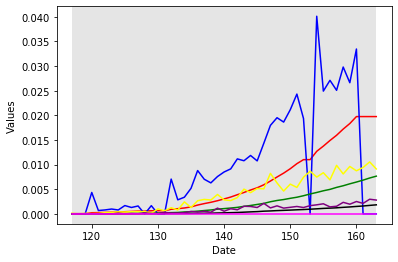

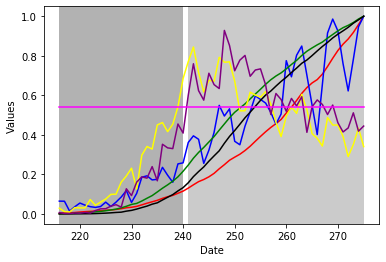

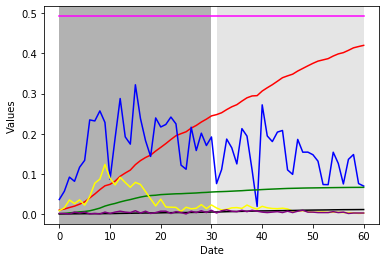

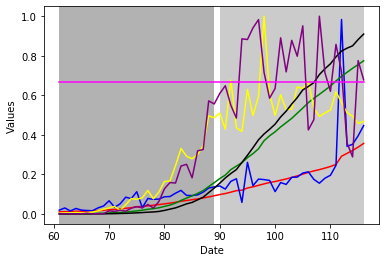

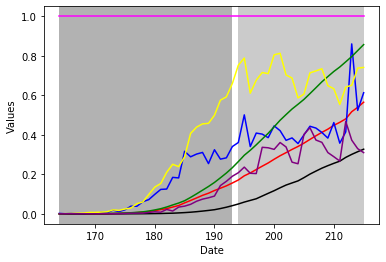

In [45]:
import matplotlib.dates as mdates

for state in temp_states:
    plt.plot(state.index, state.total_test_pc, 'red')
    plt.plot(state.index, state.daily_test_pc, 'blue')
    plt.plot(state.index, state.total_cases_pc, 'green')
    plt.plot(state.index, state.daily_cases_pc, 'yellow')
    plt.plot(state.index, state.total_dead_pc, 'black')
    plt.plot(state.index, state.daily_dead_pc, 'purple')
    #plt.plot(state.index, state.lethality, 'gray')
    plt.plot(state.index, state.GDP_pc, 'fuchsia')
    
    
    temp1 = state[state["labels"] == 0]
    temp2 = state[state["labels"] == 1]
    temp3 = state[state["labels"] == 2]
    
    try:
        min1 = temp1.index.values.min()
        max1 = temp1.index.values.max() 
        plt.axvspan(min1, max1, facecolor='0.8', alpha=0.5)
    except:
        print("")
    
    try:
        min2 = temp2.index.values.min()
        max2 = temp2.index.values.max()
        plt.axvspan(min2, max2, facecolor='0.6', alpha=0.5)
    except:
        print("")
    
    try:
        min3 = temp3.index.values.min()
        max3 = temp3.index.values.max()
        plt.axvspan(min3, max3, facecolor='0.4', alpha=0.5)
    except:
        print("")


    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

In [46]:
columns = ['total_test_pc',
       'daily_test_pc', 'total_cases_pc', 'daily_cases_pc', 'total_dead_pc',
       'daily_dead_pc', 'day_year']

temp_mgc2 = temp_mgc.loc[:, columns]
temp_mgc2.columns

Index(['total_test_pc', 'daily_test_pc', 'total_cases_pc', 'daily_cases_pc',
       'total_dead_pc', 'daily_dead_pc', 'day_year'],
      dtype='object')

In [47]:
inertia = []

list_k = list(range(1,10))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(temp_mgc2)
    inertia.append(kmeans_test.inertia_)

Text(0, 0.5, 'Sum of squared distance')

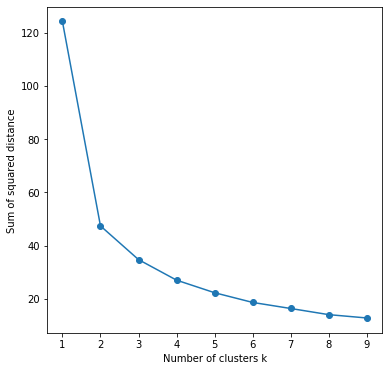

In [48]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [49]:
kmeans_test = KMeans(n_clusters=3)
kmeans_test.fit(temp_mgc2)
temp_mgc["labels"] = kmeans_test.labels_

In [50]:
temp_india = temp_mgc[temp_mgc["country_india"] == 1.0]
temp_italy = temp_mgc[temp_mgc["country_italy"] == 1.0]
temp_south_korea = temp_mgc[temp_mgc["country_south_korea"] == 1.0]
temp_united_kingdom = temp_mgc[temp_mgc["country_united_kingdom"] == 1.0]
temp_usa = temp_mgc[temp_mgc["country_usa"] == 1.0]

temp_states = [temp_india,
temp_italy,
temp_south_korea,
temp_united_kingdom,
temp_usa
]

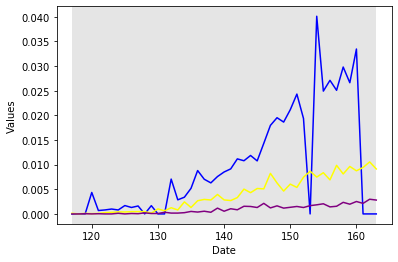

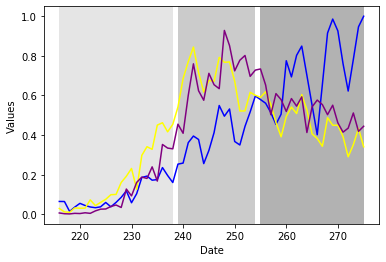

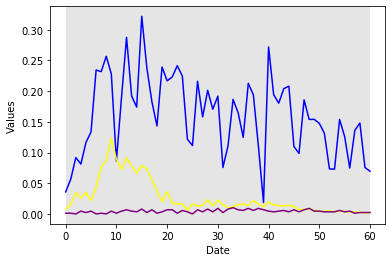

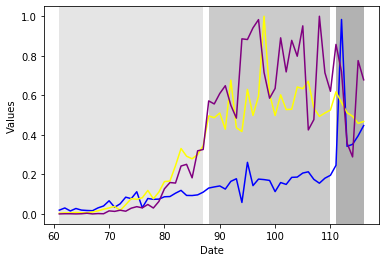

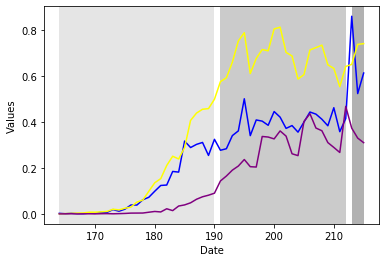

In [51]:
import matplotlib.dates as mdates

for state in temp_states:
    '''
    if(state[state["country_india"] == 1.0]): title = "India"
    elif(state[state["country_italy"] == 1.0]): title = "Italy"
    elif(state[state["country_south_korea"] == 1.0]): title = "SK"
    elif(state[state["country_united_kingdom"] == 1.0]): title = "Uk"
    elif(state[state["country_usa"] == 1.0]): title = "Usa"
    '''
    
    plt.plot(state.index, state.daily_test_pc, 'blue')
    plt.plot(state.index, state.daily_cases_pc, 'yellow')
    plt.plot(state.index, state.daily_dead_pc, 'purple')
    #plt.plot(state.index, state.lethality, 'gray')
    
    
    temp1 = state[state["labels"] == 0]
    temp2 = state[state["labels"] == 1]
    temp3 = state[state["labels"] == 2]
    
    try:
        min1 = temp1.index.values.min()
        max1 = temp1.index.values.max() 
        plt.axvspan(min1, max1, facecolor='0.8', alpha=0.5)
    except:
        print("")
    
    try:
        min2 = temp2.index.values.min()
        max2 = temp2.index.values.max()
        plt.axvspan(min2, max2, facecolor='0.6', alpha=0.5)
    except:
        print("")
    
    try:
        min3 = temp3.index.values.min()
        max3 = temp3.index.values.max()
        plt.axvspan(min3, max3, facecolor='0.4', alpha=0.5)
    except:
        print("")


    plt.xlabel('Date')
    plt.ylabel('Values')
    #plt.title(title)
    plt.show()

In [52]:
columns = ['delta_day_zero', 'day_year','labels']
ultimate_df_mgc = temp_mgc.loc[:, columns]

In [53]:
ultimate_df_mgc

,delta_day_zero,day_year,labels
0,0.000000,0.000000,0
1,0.016667,0.014286,0
2,0.033333,0.028571,0
3,0.050000,0.042857,0
4,0.066667,0.057143,0
...,...,...,...
271,0.916667,0.842857,2
272,0.933333,0.857143,2
273,0.950000,0.871429,2
274,0.966667,0.885714,2


In [54]:
inertia = []

list_k = list(range(1,10))

for k in list_k:
    kmeans_test = KMeans(n_clusters=k)
    kmeans_test.fit(ultimate_df_mgc)
    inertia.append(kmeans_test.inertia_)

Text(0, 0.5, 'Sum of squared distance')

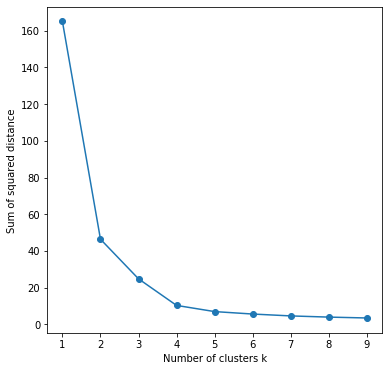

In [55]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, inertia, '-o')
plt.xlabel(r'Number of clusters k')
plt.ylabel('Sum of squared distance')

In [56]:
kmeans_test = KMeans(n_clusters=3)
kmeans_test.fit(ultimate_df_mgc)
temp_mgc["ultimate_labels"] = kmeans_test.labels_

In [57]:
print(temp_mgc.loc[:, ["ultimate_labels","labels"]])

     ultimate_labels  labels
0                  0       0
1                  0       0
2                  0       0
3                  0       0
4                  0       0
..               ...     ...
271                2       2
272                2       2
273                2       2
274                2       2
275                2       2

[276 rows x 2 columns]


In [58]:
temp_india = temp_mgc[temp_mgc["country_india"] == 1.0]
temp_italy = temp_mgc[temp_mgc["country_italy"] == 1.0]
temp_south_korea = temp_mgc[temp_mgc["country_south_korea"] == 1.0]
temp_united_kingdom = temp_mgc[temp_mgc["country_united_kingdom"] == 1.0]
temp_usa = temp_mgc[temp_mgc["country_usa"] == 1.0]

temp_states = [temp_india,
temp_italy,
temp_south_korea,
temp_united_kingdom,
temp_usa
]

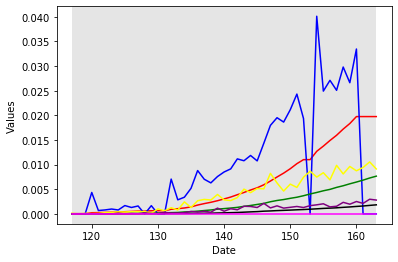

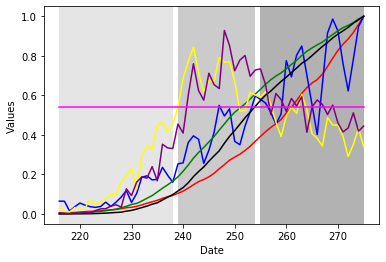

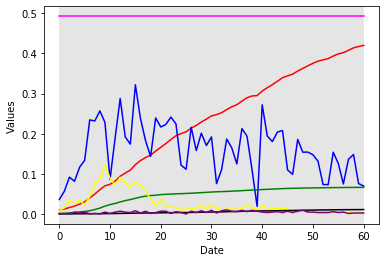

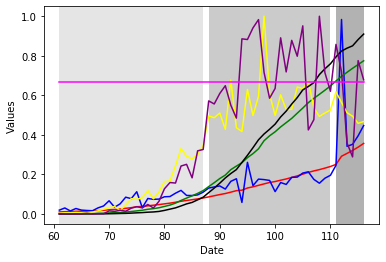

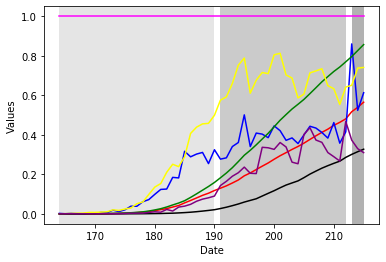

In [59]:
import matplotlib.dates as mdates

for state in temp_states:
    '''
    if(state[state["country_india"] == 1.0]): title = "India"
    elif(state[state["country_italy"] == 1.0]): title = "Italy"
    elif(state[state["country_south_korea"] == 1.0]): title = "SK"
    elif(state[state["country_united_kingdom"] == 1.0]): title = "Uk"
    elif(state[state["country_usa"] == 1.0]): title = "Usa"
    '''
    
    plt.plot(state.index, state.total_test_pc, 'red')
    plt.plot(state.index, state.daily_test_pc, 'blue')
    plt.plot(state.index, state.total_cases_pc, 'green')
    plt.plot(state.index, state.daily_cases_pc, 'yellow')
    plt.plot(state.index, state.total_dead_pc, 'black')
    plt.plot(state.index, state.daily_dead_pc, 'purple')
    #plt.plot(state.index, state.lethality, 'gray')
    plt.plot(state.index, state.GDP_pc, 'fuchsia')
    
    
    temp1 = state[state["ultimate_labels"] == 0]
    temp2 = state[state["ultimate_labels"] == 1]
    temp3 = state[state["ultimate_labels"] == 2]
    
    try:
        min1 = temp1.index.values.min()
        max1 = temp1.index.values.max() 
        plt.axvspan(min1, max1, facecolor='0.8', alpha=0.5)
    except:
        print("")
    
    try:
        min2 = temp2.index.values.min()
        max2 = temp2.index.values.max()
        plt.axvspan(min2, max2, facecolor='0.6', alpha=0.5)
    except:
        print("")
    
    try:
        min3 = temp3.index.values.min()
        max3 = temp3.index.values.max()
        plt.axvspan(min3, max3, facecolor='0.4', alpha=0.5)
    except:
        print("")


    plt.xlabel('Date')
    plt.ylabel('Values')
    #plt.title(title)
    plt.show()